weights
[[0. 0. 0.]]


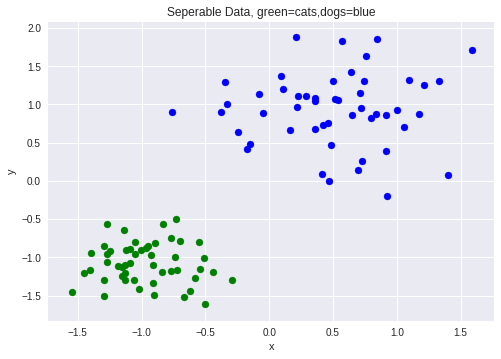

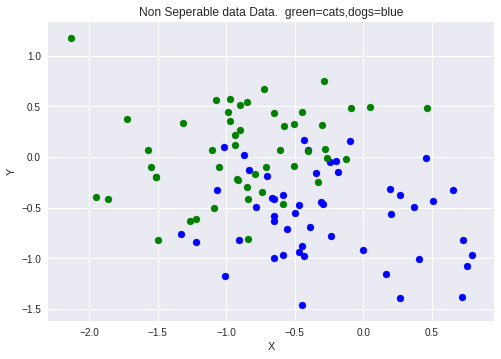

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


#Generate data
np.random.seed(932)
dataSize = 50
# Class 1 
dog_data = np.random.rand(3,dataSize)
dog_data[0] = np.random.normal(0.5, 0.5, dataSize)
dog_data[1] = np.random.normal(1, 0.5, dataSize)
dog_data[2] = np.ones([1,dataSize])

# Class 2
cat_data = np.random.rand(3,dataSize)
cat_data[0] = np.random.normal(-1, 0.3, dataSize)
cat_data[1] = np.random.normal(-1, 0.3, dataSize)
cat_data[2] = np.zeros([1,dataSize])

total_x = np.append(dog_data[0],cat_data[0])
total_y = np.append(dog_data[1],cat_data[1])
total_l = np.append(dog_data[2],cat_data[2])

combine = np.array([total_x, total_y, total_l])

# Plotting data

plt.figure(1)

for i in range(dataSize*2):
    # Note: Prob a better way to do this
    if(combine[2,i] == 1):
      plt.scatter(combine[0,i],combine[1,i],c='b')
    else:
      plt.scatter(combine[0,i],combine[1,i],c='g')

plt.title('Seperable Data, green=cats,dogs=blue')
plt.xlabel('x')
plt.ylabel('y')
      
# TEST SET
# Class 1 
dog_data_test = np.random.rand(3,dataSize)
dog_data_test[0] = np.random.normal(-0.3, 0.5, dataSize)
dog_data_test[1] = np.random.normal(-0.5, 0.5, dataSize)
dog_data_test[2] = np.ones([1,dataSize])

# Class 2
cat_data_test = np.random.rand(3,dataSize)
cat_data_test[0] = np.random.normal(-1, 0.5, dataSize)
cat_data_test[1] = np.random.normal(0, 0.4, dataSize)
cat_data_test[2] = np.zeros([1,dataSize])

total_x_test = np.append(dog_data_test[0],cat_data_test[0])
total_y_test = np.append(dog_data_test[1],cat_data_test[1])
total_l_test = np.append(dog_data_test[2],cat_data_test[2])


plt.figure(2)

#Plotting data
combine_1 = np.array([total_x_test, total_y_test, total_l_test])

for i in range(dataSize*2):
    # Note: Prob a better way to do this
    if(combine_1[2,i] == 1):
      plt.scatter(combine_1[0,i],combine_1[1,i],c='b')
    else:
      plt.scatter(combine_1[0,i],combine_1[1,i],c='g')
      
      
plt.title('Non Seperable data Data.  green=cats,dogs=blue')
plt.xlabel('X')
plt.ylabel('Y') 

weights = np.array([np.random.uniform(low=0, high=0, size=(len(combine_1)))]) 
print("weights")
print(weights)


In [0]:
# 3.1.2 Perform classification with a single-layer perceptron and analyse the results
# Perc

#Labels


#activations = np.matmul(weights,data)

def graph(formula, x_range, color,  alpha):  
    x = np.array(x_range)
    y = formula(x)
    plt.scatter(x,y, s=1, linewidths=0.1, color=color)
    plt.plot(x,y, c=color, alpha=min(1,alpha))  

def activationArr(arr):
  return np.where(arr>0,1,0)    
    
def baseGraph(weights, color, alpha):
  x2=[weights[0,0],weights[0,1],-weights[0,1],weights[0,0]]
  x3=[weights[0,0],weights[0,1],weights[0,1],-weights[0,0]]

  x2x3 =np.array([x2,x3])
  X,Y,U,V = zip(*x2x3)
  ax = plt.gca()
  ax.quiver(X,Y,U,V,scale=0.1, color=color, alpha=min(1,alpha))
  #slope = -(weights[0,0]/weights[0,2])/(weights[0,0]/weights[0,1])  
  #intercept = -weights[0,0]/weights[0,2]

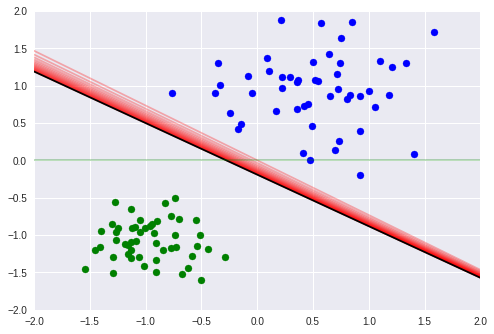

Text(0,0.5,u'Total Loss')

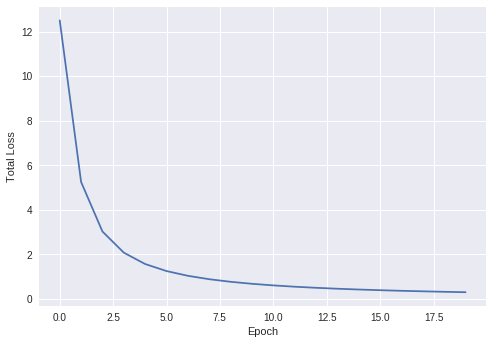

In [13]:
# Delta rule
# apply activation function to activations before calculating the error

# values
eta = 0.01
epoch = 20

dataUsed = combine

transData2 =  np.transpose(dataUsed)

dataInput2 = transData2[:,0:2]  #[100,2]    
labels2 = transData2[:,2:3]     #[100,1] 

#label = dataUsed[2];
#biasVector = np.ones(dataSize*2) 

#data = np.array([dataInput2[0], dataInput2[1], biasVector])

newWeights_Perc = np.transpose(deepcopy(weights)) #[3,1]

dataInput2 = np.concatenate((dataInput2,np.ones((len(dataInput2),1))),axis=1)  # [100,3]

def sigmoid(inputs):
  """
  Calculate the sigmoid for the give inputs (array)
  :param inputs:
  :return:
  """
  sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
  return sigmoid_scores

# Defining the sigmoid function
def sigmoid2(value):
  return 1.0/(1.0+np.exp(-1*value))


def heavySide(inputs):
  h_score = [0.5 * (np.sign(float(x) + 1)) for x in inputs]
  return h_score
   


totalError = []


plt.figure(1)
Batch = True  
if(Batch):
  for i in range (epoch): # epoch
    activations_new_Perc = np.dot(dataInput2, newWeights_Perc); 
    y = sigmoid2(activations_new_Perc)
    #y = activationArr(activations_new_Perc)
    #y=activations_new_Perc

    gurk = np.transpose(y - labels2)

    update1 = eta*np.dot(gurk, dataInput2)
    newWeights_Perc -= np.transpose(update1)

    error = np.sum((labels2-y)**2)*(0.5)                                    
    totalError.append(error)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    V = newWeights_Perc
    a, b = -V[0]/V[1], -V[2]/V[1]
    l = np.linspace(-2,2)
    plt.plot(l, a*l+b, 'r-', alpha=0.3)
else:
  for i in range (epoch): # epoch
    for k in range(2*dataSize):
      #hidden_n,output_n = feedForwardValue(dataInput[k,:]) 
      activations_new_Perc = np.dot(dataInput2[k,:], newWeights_Perc); 
      #y = sigmoid2(activations_new_Perc)
      y = activationArr(activations_new_Perc)
      gurk = np.transpose(y - labels2[k,:])
      #print(gurk)

      update1 = eta*gurk* dataInput2[k,:]
      #print([update1])
      #print(newWeights_Perc)
      newWeights_Perc -= np.transpose([update1])

      error = np.sum((labels2[k,:]-y)**2)*(0.5)                                    
      totalError.append(error)


      


plt.xlim(-2,2)
plt.ylim(-2,2)
V = newWeights_Perc
a, b = -V[0]/V[1], -V[2]/V[1]
l = np.linspace(-2,2)
plt.plot(l, a*l+b, 'k-')

plt.xlim(-2,2)
plt.ylim(-2,2)
a, b = 0, 0
l = np.linspace(-2,2)
plt.plot(l, a*l+b, 'g-', alpha=0.3)
    


for i in range(len(combine[0])):
  if(combine[2,i] == 1):
    plt.scatter(dataUsed[0,i],dataUsed[1,i],c='b')
  else:
    plt.scatter(dataUsed[0,i],dataUsed[1,i],c='g')

plt.show()  
 
plt.figure(2)
plt.plot(totalError)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
